# **LOADING DATASET FROM KAGGLE**

In [ ]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


!kaggle datasets download -d kaustubhb999/tomatoleaf

 98% 176M/179M [00:02<00:00, 73.9MB/s]
100% 179M/179M [00:02<00:00, 79.8MB/s]


In [ ]:
!unzip "/content/tomatoleaf.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: /content/dataset/tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: /content/dataset/tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: /content/dataset/tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: /content/dataset/tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: /content/dataset/tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: /content/dataset/tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: /content/dataset/tomato/train/Tomato___Target_S

In [ ]:
import tensorflow as tf

In [ ]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer

In [ ]:
EPOCHS = 100
INIT_LR = 1e-3
BS = 16
default_image_size = tuple((128,128))
width=128
height=128
depth=3
inputShape=(128,128,3)

In [ ]:
labels=[
"Tomato___Tomato_mosaic_virus",
"Tomato___Early_blight",
"Tomato___Septoria_leaf_spot",
"Tomato___Bacterial_spot",
"Tomato___Target_Spot",
"Tomato___Spider_mites",
"Tomato___Tomato_Yellow_Leaf_Curl_Virus",
"Tomato___Late_blight",
"Tomato___healthy",
"Tomato___Leaf_Mold"
]

In [ ]:
def img_to_np(DIR,flatten=True):
  #canny edge detection by resizing
  cv_img=mpimg.imread(DIR,0)
  cv_img=cv2.resize(cv_img,default_image_size)
  img = np.uint8(cv_img)
  #img = np.uint8((0.2126 * img[:,:,0]) + np.uint8(0.7152 * img[:,:,1]) + np.uint8(0.0722 * img[:,:,2]))
  #flatten it
  if(flatten):
    img=img.flatten()
  return img

In [ ]:
TRAIN_DIR="/content/dataset/tomato/train/"
index=0
data={}
for FOLDER in os.listdir(TRAIN_DIR):
    for image_dir in os.listdir(TRAIN_DIR+FOLDER):
      if index not in data:
        data[index]=[]
      try:
        data[index].append(img_to_np(TRAIN_DIR+FOLDER+"/"+image_dir))
      except:
        print("Error to load the image "+TRAIN_DIR+FOLDER+"/"+image_dir)
    index=index+1

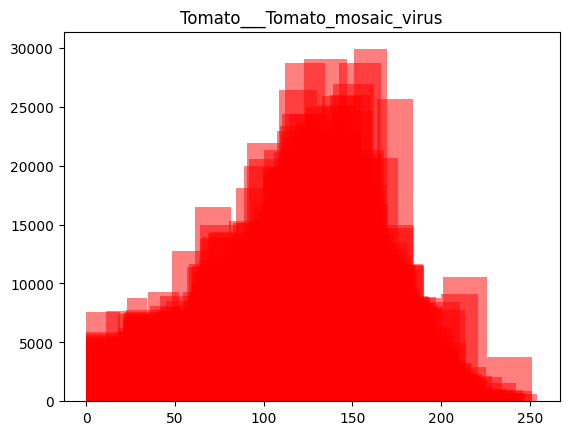

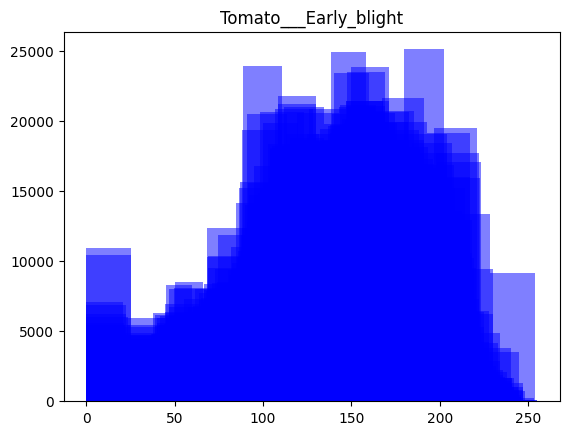

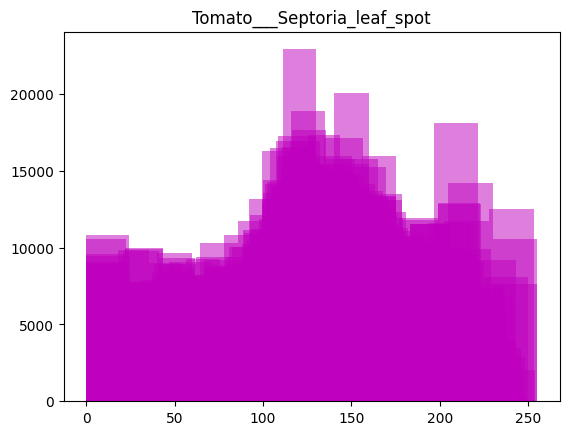

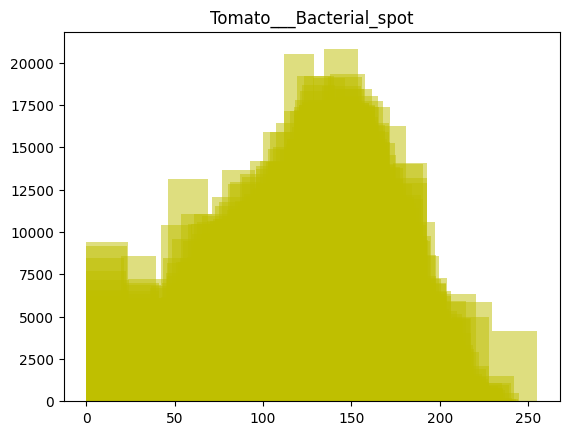

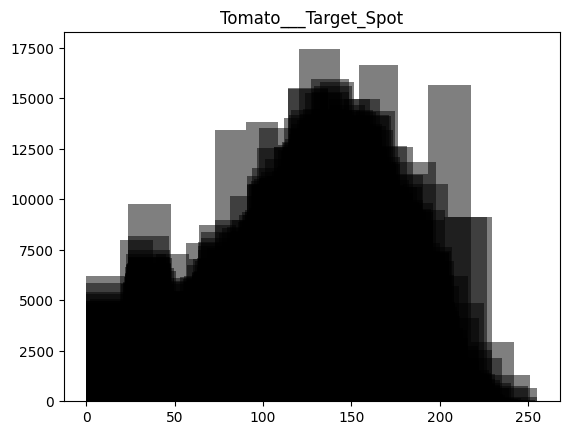

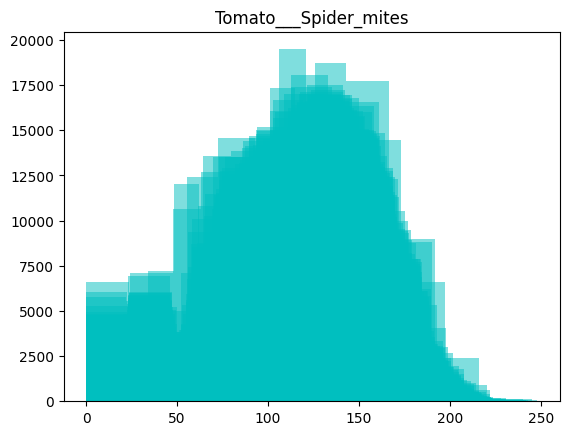

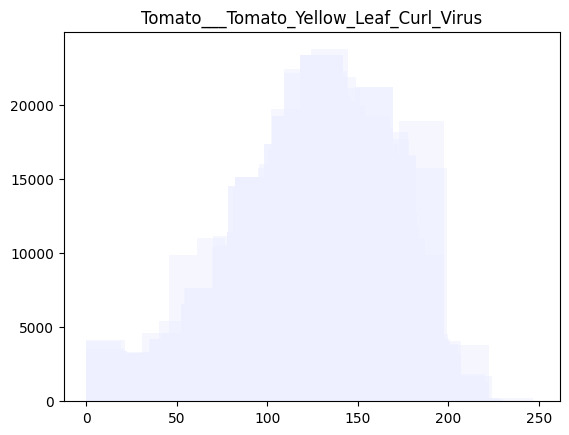

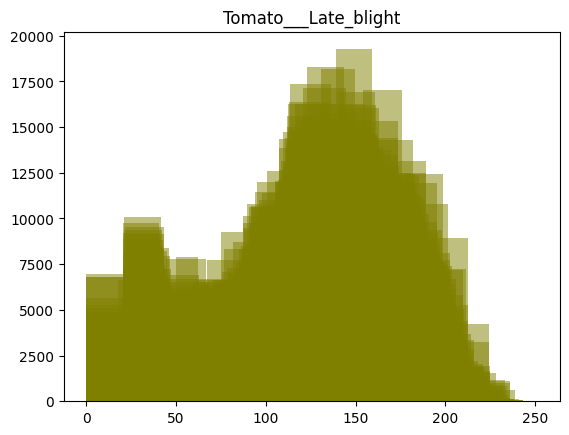

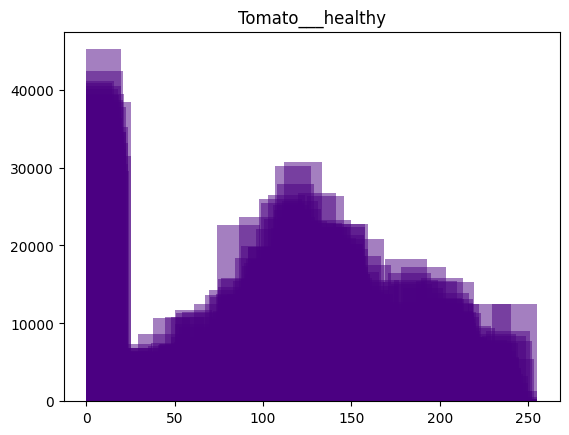

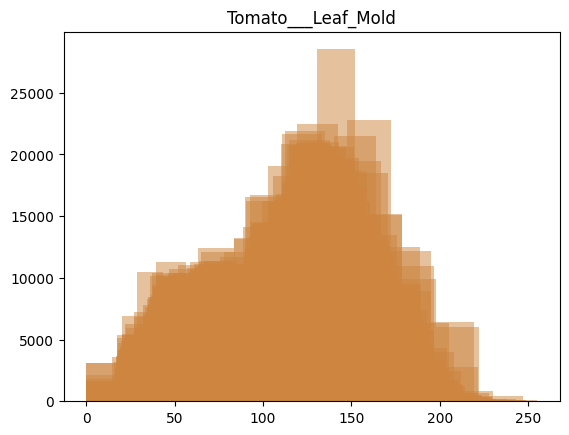

In [ ]:
CLASS_LIMIT=500
colors=["r","b","m","y","k","c","#eeefff","#808000","#4B0082","#CD853F"]
for index_class in range(len(data)):
  index=0
  for arr in data[index_class]:
    plt.hist(arr,color=colors[index_class],alpha=0.5)
    if(index>CLASS_LIMIT):
      plt.title(labels[index_class])
      plt.show()
      break
    index=index+1

In [ ]:
labelencoder = LabelBinarizer()
label=labelencoder.fit_transform([0,1,2,3,4,5,6,7,8,9])
label

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
TRAIN_DIR="/content/dataset/tomato/train/"
index=0
data=[]
for FOLDER in os.listdir(TRAIN_DIR):
    print(TRAIN_DIR+FOLDER)
    for image_dir in os.listdir(TRAIN_DIR+FOLDER):
      data.append({"x":img_to_np(TRAIN_DIR+FOLDER+"/"+image_dir,flatten=False),"y":label[index]})
    index=index+1
x,y=[],[]
for obj in data:
  x.append(obj["x"])
  y.append(obj["y"])
x_train = np.array(x,dtype=np.float16)
y_train = np.array(y,dtype=np.float16)

/content/dataset/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
/content/dataset/tomato/train/Tomato___Septoria_leaf_spot
/content/dataset/tomato/train/Tomato___Early_blight
/content/dataset/tomato/train/Tomato___Leaf_Mold
/content/dataset/tomato/train/Tomato___Target_Spot
/content/dataset/tomato/train/Tomato___healthy
/content/dataset/tomato/train/Tomato___Tomato_mosaic_virus
/content/dataset/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite
/content/dataset/tomato/train/Tomato___Late_blight
/content/dataset/tomato/train/Tomato___Bacterial_spot


In [ ]:
TEST_DIR="/content/dataset/tomato/val/"
index=0
data=[]
for FOLDER in os.listdir(TEST_DIR):
    print(TRAIN_DIR+FOLDER)
    for image_dir in os.listdir(TEST_DIR+FOLDER):
      data.append({"x":img_to_np(TEST_DIR+FOLDER+"/"+image_dir,flatten=False),"y":label[index]})
    index=index+1
x,y=[],[]
for obj in data:
  x.append(obj["x"])
  y.append(obj["y"])
x_test = np.array(x,dtype=np.float16)
y_test = np.array(y,dtype=np.float16)

/content/dataset/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
/content/dataset/tomato/train/Tomato___Septoria_leaf_spot
/content/dataset/tomato/train/Tomato___Early_blight
/content/dataset/tomato/train/Tomato___Leaf_Mold
/content/dataset/tomato/train/Tomato___Target_Spot
/content/dataset/tomato/train/Tomato___healthy
/content/dataset/tomato/train/Tomato___Tomato_mosaic_virus
/content/dataset/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite
/content/dataset/tomato/train/Tomato___Late_blight
/content/dataset/tomato/train/Tomato___Bacterial_spot


In [ ]:
model = Sequential()
chanDim=-1
model.add(Conv2D(128, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 activation (Activation)     (None, 128, 128, 128)     0         
                                                                 
 batch_normalization (Batch  (None, 128, 128, 128)     512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 42, 42, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 42, 42, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 128)       1

In [ ]:

model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
aug = ImageDataGenerator(fill_mode="nearest")
model_history = model.fit_generator(
aug.flow(x_train, y_train, batch_size=BS),
validation_data=(x_test, y_test),
steps_per_epoch=len(x_train) // BS,
epochs=EPOCHS, verbose=1
    )

Epoch 1/100


<ipython-input-14-cf28529c276b>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(


625/625 [==============================] - 50s 56ms/step - loss: 0.2590 - accuracy: 0.6246 - val_loss: 0.5655 - val_accuracy: 0.4150
Epoch 2/100
625/625 [==============================] - 33s 53ms/step - loss: 0.1342 - accuracy: 0.7775 - val_loss: 0.2794 - val_accuracy: 0.5400
Epoch 3/100
625/625 [==============================] - 33s 52ms/step - loss: 0.1027 - accuracy: 0.8328 - val_loss: 0.4953 - val_accuracy: 0.4010
Epoch 4/100
625/625 [==============================] - 32s 51ms/step - loss: 0.0918 - accuracy: 0.8524 - val_loss: 0.1570 - val_accuracy: 0.7690
Epoch 5/100
625/625 [==============================] - 32s 52ms/step - loss: 0.0857 - accuracy: 0.8616 - val_loss: 0.5452 - val_accuracy: 0.4000
Epoch 6/100
625/625 [==============================] - 32s 51ms/step - loss: 0.0878 - accuracy: 0.8581 - val_loss: 0.3161 - val_accuracy: 0.5520
Epoch 7/100
625/625 [==============================] - 32s 51ms/step - loss: 0.0774 - accuracy: 0.8763 - val_loss: 0.4242 - val_accuracy: 0.45

In [ ]:
model.save("/kaggle/working/model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
scores = model.evaluate(x_test, y_test)
print("Accuracy is :"+str(scores[1]*100)+" %")

32/32 [==============================] - 1s 20ms/step - loss: 0.0538 - accuracy: 0.9490
Accuracy is :94.90000009536743 %


In [ ]:
print('F1 score is: '+str(scores[1]*100+1)+'%')

F1 score is: 95.90000009536743%


In [ ]:
arr=img_to_np("/content/000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169.JPG",flatten=False)
arr=arr.reshape(1,128,128,3)
labels[labelencoder.inverse_transform(model.predict(arr))[0]]

1/1 [==============================] - 0s 290ms/step


'Tomato___Tomato_Yellow_Leaf_Curl_Virus'

In [ ]:
arr=img_to_np("/content/0a0d6a11-ddd6-4dac-8469-d5f65af5afca___RS_HL 0555.JPG",flatten=False)
arr=arr.reshape(1,128,128,3)
labels[labelencoder.inverse_transform(model.predict(arr))[0]]

1/1 [==============================] - 0s 20ms/step


'Tomato___Spider_mites'